#### Objetivo del proyecto ####

El objetivo es poder predecir el precio de los coches BMW en función a sus características específicas

#### 1 - Importamos librerías ####

In [ ]:
#Importamos el google.colab desde el drive

from google.colab import drive
drive.mount('/content/drive')

#Librerías varias  para nuestro posterior análisis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

import folium
import plotly.express as px

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2 - Leemos el fichero y realizamos un primer check de los datos ####

In [ ]:
#leemos el fichero de bmw contenido dentro de la carpeta
df_bmw=pd.read_csv("/content/drive/MyDrive/ADB/Master Data Science/Proyecto #1 - BMW/bmw_pricing_v2.csv")

In [ ]:
df_bmw.head() #Vemos las primeras 5 filas para tener un primer entendimiento del dataframe

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw.info() #Para visualizar cantidad, tipos, nombre de cada columna con sus datos

# Al ser una base de datos de BMW, validaremos luego, pero la columna marca parece que no tiene mucha información valiosa
# La potencia podríamos redondearla
# Cambiar los tipo fecha
# Varias variables de tipo objeto que deberían ser booleanas
# Nuestro TARGET será precio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.describe().T #Observamos sin entrar en detalle si exsiten datos erróneos

#Hay KM negativo y con 1M
#Hay potencia en cero
#Hay precio por 500


,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [ ]:
df_bmw.isnull().sum() #Observamos cuántos nulls tiene cada columna

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
len(df_bmw[df_bmw.duplicated()]) #Identificamos si existen duplicados dentro del df

0

#### 3 - Empezamos a realizar los análisis para cada columna ####

3.0 - TARGET = Precio

<Axes: >

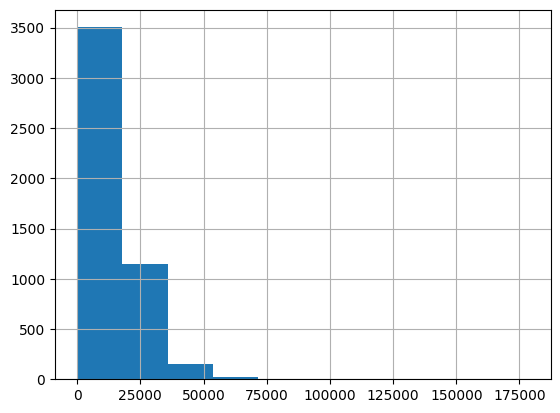

In [ ]:
df_bmw['precio'].hist()

#Analizaremos los precios menores a 600€ y también los mayores a 75.000€

<Axes: xlabel='precio'>

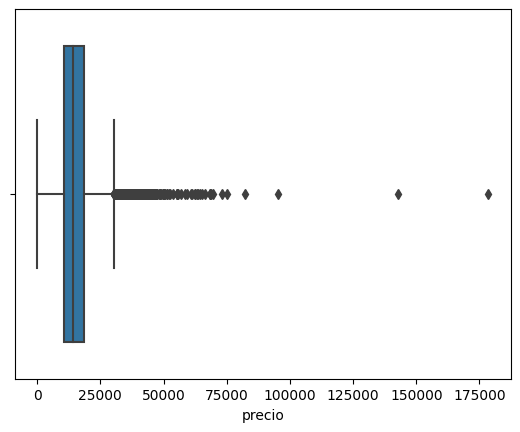

In [ ]:
sns.boxplot(x=df_bmw["precio"])

#Vemos que existen outliers, procedemos a analizarlos

In [ ]:
len(df_bmw[df_bmw['precio'] < 500]) #Existen 15 coches con un valor inferior a 500€

15

In [ ]:
df_bmw[df_bmw['precio'] < 500]

#Modelos 320, 318, 520, 116, 525, 316, X3

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,BMW,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1513,BMW,520,358332.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [ ]:
df_bmw.drop(df_bmw[df_bmw['precio'] <500].index, inplace=True) #Eliminamos precios < 500

In [ ]:
len(df_bmw[df_bmw['precio'] > 100000]) #Existen 4 coches con un valor superior a 100.000€

2

In [ ]:
df_bmw.drop(df_bmw[df_bmw['precio'] > 100000].index, inplace=True) #Eliminamos precios > 100.000

<Axes: >

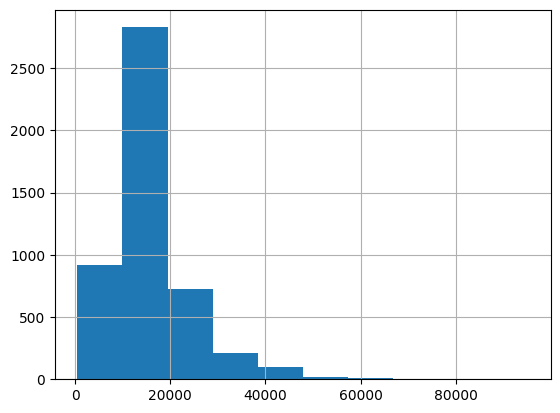

In [ ]:
df_bmw['precio'].hist() #Validamos que aún tiene una distribución a la derecha, pero luego normalizaremos el TARGET

3.1 - Marca

In [ ]:
df_bmw['marca'].value_counts() #Observamos que la columna marca sólo tiene 1 dato, con lo cual procederíamos luego a eliminarla ya que no nos aportará ningún valor a nuestro objetivo

BMW    4824
Name: marca, dtype: int64

In [ ]:
del(df_bmw['marca']) #Eliminamos la columna marca

3.2 - Tipo coche

In [ ]:
df_bmw['tipo_coche'].value_counts() #Verificamos cuántos tipos de tipo_coche existen, por un posible agrupamiento o eliminación de los datos

#Primero identificaremos la relación entre cada tipo de coche y su precio
#Luego, los agruparemos

estate         1598
sedan          1160
suv            1054
hatchback       698
subcompact      113
coupe           104
convertible      47
van              43
Name: tipo_coche, dtype: int64

<Axes: xlabel='tipo_coche', ylabel='precio'>

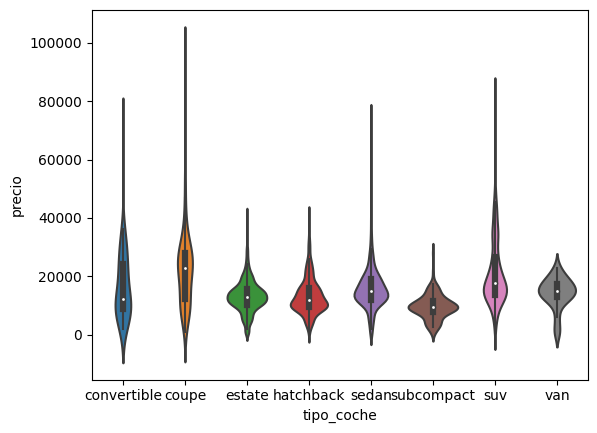

In [ ]:
sns.violinplot(x="tipo_coche", y="precio", data=df_bmw) #VARIABLE NO NUMERICA

#Dejaremos los tipos de coche como están, ya que cada uno puede ser un poco diferente que el resto
#Analizaremos los posibles outliers cuando analicemos el TARGET

3.2 - Modelo

In [ ]:
df_bmw[df_bmw['modelo'].isnull()] #Observamos los nulos de la columna modelo, para ver si eliminamos las filas o realizamos otra acción diferente

#Una opción sería asignarles el valor "sin modelo", otra opción sería eliminarlos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


In [ ]:
len(df_bmw["modelo"].value_counts())

76

In [ ]:
df_bmw["modelo"].value_counts()

320                750
520                631
318                565
X3                 436
116                357
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"]>50000)]

#Vemos que efectivamente el coche con modelo X4 y precio superior a 100.000 es un outlier ya que de media, el precio del mismo modelo es inferior a 40.000

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01


In [ ]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"] > 50000)].index)

In [ ]:
df_bmw[(df_bmw["modelo"] == "X3") & (df_bmw["precio"]>50000)]

#Vemos que efectivamente el coche con modelo X3 y precio superior a 100.000 es un outlier ya que de media, el precio del mismo modelo es inferior a 40.000

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "X3") & (df_bmw["precio"] > 50000)].index)

In [ ]:
df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"]>1000)]

#Vemos que efectivamente el coche con modelo i8 lo eliminamos ya que sólo existe esta fila como referencia

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"] > 1000)].index)

In [ ]:
df_bmw[(df_bmw["modelo"] == "X5 M") & (df_bmw["precio"]>50000)]

#No estamos seguros de que realmente sea un outlier, por lo que por el momento no lo eliminaremos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4110,X5 M,25931.0,190.0,2016-01-01,diesel,white,suv,True,True,False,False,False,False,True,True,63100.0,2018-04-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,True,False,True,False,False,False,True,73100.0,2018-08-01


3.3 - Tipo gasolina

In [ ]:
df_bmw[df_bmw['tipo_gasolina'].isnull()] #Observamos los nulos de la columna tipo_gasolina, para ver si eliminamos las filas o realizamos otra acción diferente

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01


In [ ]:
df_bmw["tipo_gasolina"].value_counts()

diesel           4618
petrol            188
hybrid_petrol       7
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw["tipo_gasolina"]=df_bmw["tipo_gasolina"].replace({'diesel':'Diesel'}) #Unificamos los valores
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace(['Hybrid Petrol', 'Electro'], 'petrol') #unificamos valores

In [ ]:
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace(['hybrid_petrol', 'electro'], 'petrol') #unificamos valores

In [ ]:
df_bmw["tipo_gasolina"].value_counts()

Diesel    4623
petrol     198
Name: tipo_gasolina, dtype: int64

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

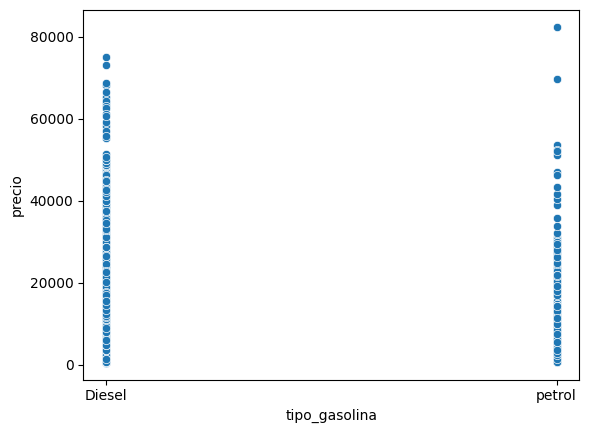

In [ ]:
sns.scatterplot(x="tipo_gasolina", y="precio", data=df_bmw) #VARIABLE NUMERICA

#Analizamos si es que influye el precio según el tipo de gasolina

In [ ]:
del(df_bmw['tipo_gasolina']) #decidimos eliminar la columna tipo_gasolina ya que tiene poca variedad de datos y los precios no son muy diferentes

3.4 - Color

In [ ]:
df_bmw[df_bmw['color'].isnull()] #Observamos los nulos de la columna color, para ver si eliminamos las filas o realizamos otra acción diferente

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [ ]:
df_bmw['color'].value_counts()

black     1627
grey      1166
blue       702
white      536
brown      341
silver     325
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='precio'>

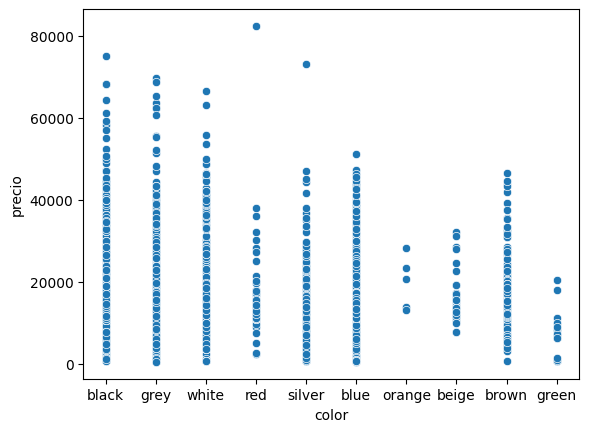

In [ ]:
sns.scatterplot(x="color", y="precio", data=df_bmw) #VARIABLE NUMERICA

#Analizamos si es que influye el precio según el tipo de gasolina

In [ ]:
del(df_bmw['color']) #decidimos eliminar la columna color ya que tiene poca variedad de datos y los precios no son muy diferentes

3.5 - Generamos copia y eliminamos todos los nulos

In [ ]:
df_bmw1 = df_bmw.copy() #generamos una copia para eliminar todos los nulos, ya que no son muchos sobre el total del universo

In [ ]:
df_bmw1.dropna(inplace = True)

In [ ]:
df_bmw1.isnull().sum() #Validamos que no existan nuevos nulos

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

3.6 - Fecha_registro

In [ ]:
# Convertimos la columna 'fecha_registro' al formato de fecha
df_bmw1['fecha_registro']=pd.to_datetime(df_bmw1['fecha_registro'])

# Extraer el año de la columna 'fecha_registro'
df_bmw1['anio_registro']=df_bmw1['fecha_registro'].apply(lambda x:datetime.strftime(x,'%Y'))
df_bmw1['mes_registro'] = df_bmw1['fecha_registro'].apply(lambda x: datetime.strftime(x, '%m'))

In [ ]:
df_bmw1["anio_registro"].value_counts() #Verificamos los años de registro

2013    1527
2014    1270
2012     817
2015     310
2011     214
2010     103
2008     102
2009      85
2016      82
2006      67
2007      58
2005      52
2004      26
2001      17
2003      16
2017      11
2002       8
2000       8
1999       3
1998       2
1996       1
1995       1
1990       1
1997       1
Name: anio_registro, dtype: int64

In [ ]:
df_bmw1["mes_registro"].value_counts() #Verificamos los años de registro

03    464
01    452
10    446
07    445
06    442
05    435
09    416
04    406
02    393
11    343
08    331
12    209
Name: mes_registro, dtype: int64

In [ ]:
 # Convertimos la columna 'fecha_venta' al formato de fecha
df_bmw1['fecha_venta']=pd.to_datetime(df_bmw1['fecha_venta'])

# Extraer el año de la columna 'fecha_venta'
df_bmw1['anio_venta']=df_bmw1['fecha_venta'].apply(lambda x:datetime.strftime(x,'%Y'))
df_bmw1['mes_venta'] = df_bmw1['fecha_venta'].apply(lambda x: datetime.strftime(x, '%m'))

In [ ]:
df_bmw1["anio_venta"].value_counts() #Verificamos los años de venta

2018    4778
2007       1
2010       1
2009       1
2008       1
Name: anio_venta, dtype: int64

In [ ]:
del(df_bmw1['anio_venta']) #Eliminamos la columna anio_venta ya que no suma ningún dato

In [ ]:
df_bmw1["mes_venta"].value_counts() #Verificamos los meses de venta

05    804
03    726
04    688
06    599
07    532
08    519
02    490
09    220
01    204
Name: mes_venta, dtype: int64

In [ ]:
del(df_bmw1['fecha_registro']) #Eliminamos la fecha_registro

In [ ]:
del(df_bmw1['fecha_venta']) #Eliminamos la fecha_venta

#### 3.7 - Tipos booleanos

In [ ]:
#Primero convertimos las variables en tipo booleano, para luego analizarlas en su conjunto
#tipo_coche	- volante_regulable	- aire_acondicionado	- camara_trasera	- asientos_traseros_plegables	- elevalunas_electrico	- bluetooth	- gps	- alerta_lim_velocidad

In [ ]:
variables_boolenas = ["tipo_coche", "volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevacunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad"]

In [ ]:
for i in range(len(variables_boolenas)):
    variables_boolenas[i] = bool(variables_boolenas[i])

3.7.1 - Volante_regulable

In [ ]:
df_bmw1["volante_regulable"].value_counts() #Tiene buena distribución, lo dejaremos ya que es relevante para el modelo

True     2638
False    2144
Name: volante_regulable, dtype: int64

<Axes: xlabel='volante_regulable', ylabel='precio'>

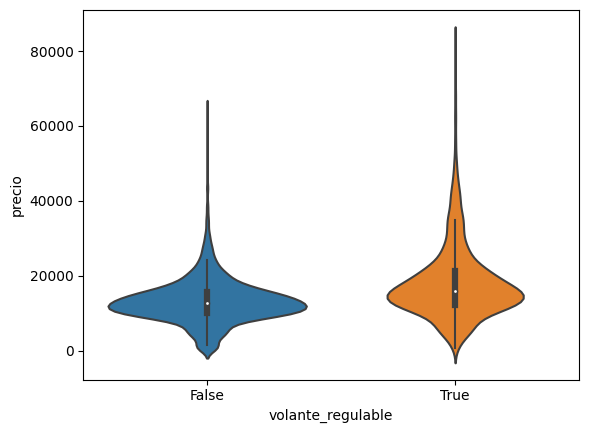

In [ ]:
sns.violinplot(x="volante_regulable", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.2 Aire_acondicionado

In [ ]:
df_bmw1["aire_acondicionado"].value_counts() #Tiene distribución 80-20, lo dejaremos ya que es relevante para el modelo

True     3807
False     975
Name: aire_acondicionado, dtype: int64

<Axes: xlabel='aire_acondicionado', ylabel='precio'>

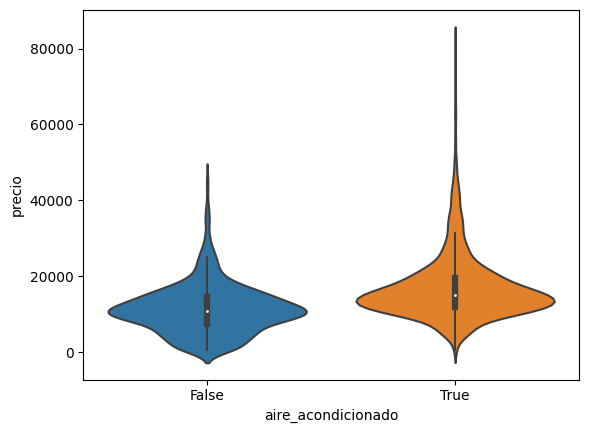

In [ ]:
sns.violinplot(x="aire_acondicionado", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.3 Camara_trasera

In [ ]:
df_bmw1["camara_trasera"].value_counts() #Tiene distribución 80-20, lo dejaremos ya que es relevante para el modelo

False    3817
True      965
Name: camara_trasera, dtype: int64

<Axes: xlabel='camara_trasera', ylabel='precio'>

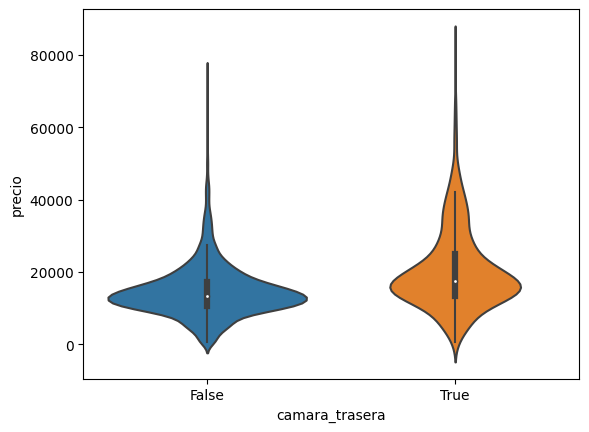

In [ ]:
sns.violinplot(x="camara_trasera", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.4 Asientos_traseros_plegables

In [ ]:
df_bmw1["asientos_traseros_plegables"].value_counts() #Tiene distribución 80-20, lo dejaremos ya que es relevante para el modelo

False    3824
True      958
Name: asientos_traseros_plegables, dtype: int64

<Axes: xlabel='asientos_traseros_plegables', ylabel='precio'>

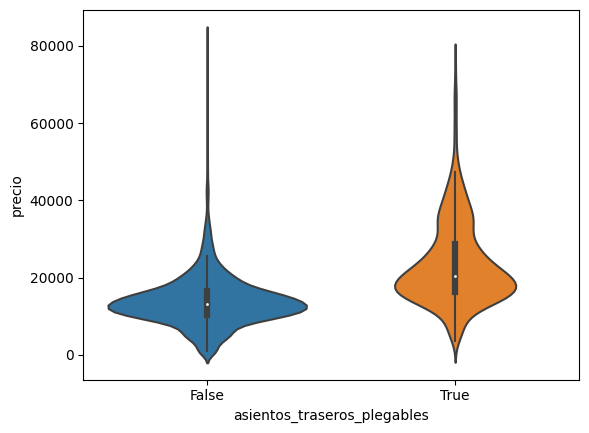

In [ ]:
sns.violinplot(x="asientos_traseros_plegables", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.5 Elevalunas_electrico

In [ ]:
df_bmw1["elevalunas_electrico"].value_counts() #Tiene buena distribución , lo dejaremos ya que es relevante para el modelo

False    2575
True     2207
Name: elevalunas_electrico, dtype: int64

<Axes: xlabel='elevalunas_electrico', ylabel='precio'>

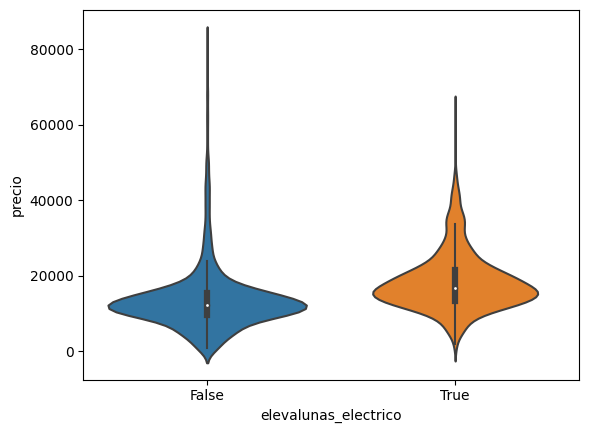

In [ ]:
sns.violinplot(x="elevalunas_electrico", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.6 Bluetooth

In [ ]:
df_bmw1["bluetooth"].value_counts() #Tiene buena distribución , lo dejaremos ya que es relevante para el modelo

False    3622
True     1160
Name: bluetooth, dtype: int64

<Axes: xlabel='bluetooth', ylabel='precio'>

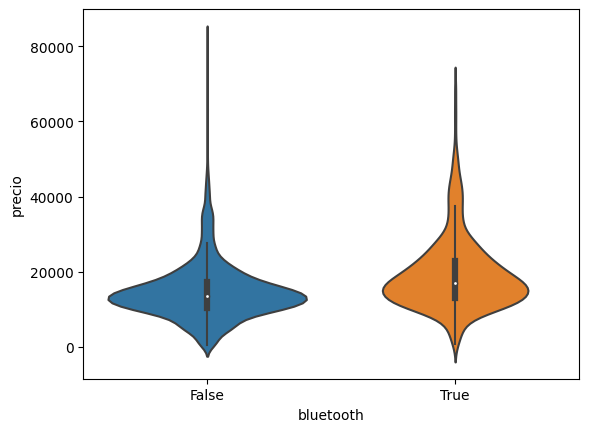

In [ ]:
sns.violinplot(x="bluetooth", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.7 GPS

In [ ]:
df_bmw1["gps"].value_counts() #Tiene distribución 90-10, lo dejaremos ya que es relevante para el modelo

True     4462
False     320
Name: gps, dtype: int64

<Axes: xlabel='gps', ylabel='precio'>

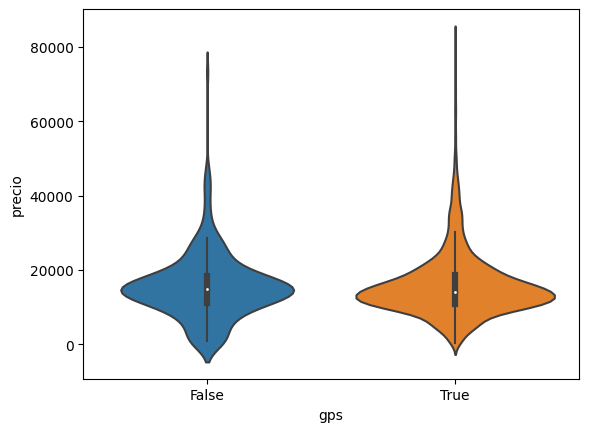

In [ ]:
sns.violinplot(x="gps", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

3.7.8 Alerta_lim_velocidad

In [ ]:
df_bmw1["alerta_lim_velocidad"].value_counts() #Tiene buena distribución, lo dejaremos ya que es relevante para el modelo

True     2588
False    2194
Name: alerta_lim_velocidad, dtype: int64

<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

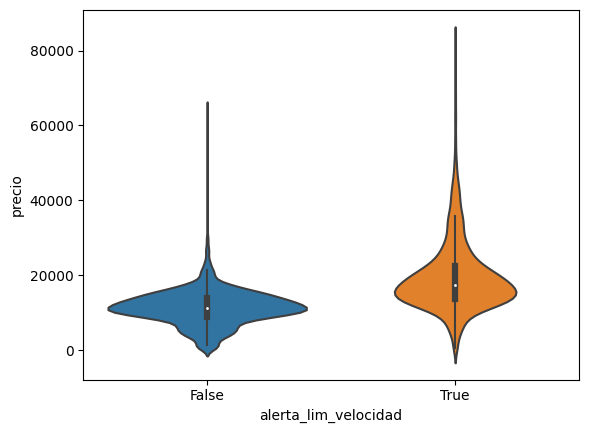

In [ ]:
sns.violinplot(x="alerta_lim_velocidad", y="precio", data=df_bmw1) #VARIABLE NO NUMERICA

#### 4. KM

In [ ]:
df_bmw1.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
0,118,140411.0,100.0,convertible,True,True,False,False,True,True,True,False,11300.0,2012,02,01
1,M4,13929.0,317.0,convertible,True,True,False,False,False,True,True,True,69700.0,2016,04,02
2,320,183297.0,120.0,convertible,False,False,False,False,True,False,True,False,10200.0,2012,04,02
3,420,128035.0,135.0,convertible,True,True,False,False,True,True,True,True,25100.0,2014,07,02
4,425,97097.0,160.0,convertible,True,True,False,False,False,True,True,True,33400.0,2014,12,04


<Axes: xlabel='km', ylabel='precio'>

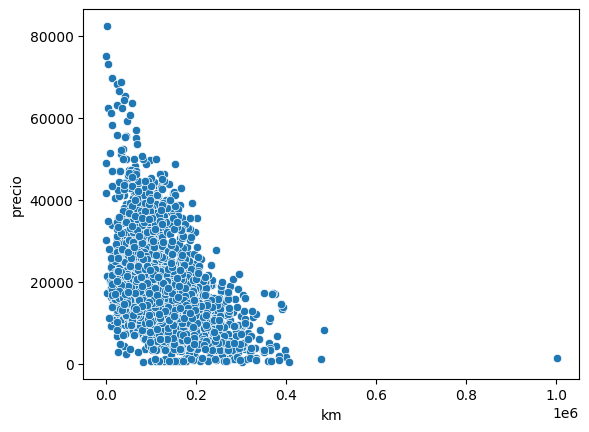

In [ ]:
sns.scatterplot(x="km", y="precio", data=df_bmw1) #VARIABLE NUMERICA

#Analizaremos los outliers

In [ ]:
df_bmw1[df_bmw1["km"]<100] #Validamos si existen valor demasido bajos

#Eliminaremos la fila con km negativos

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
2938,640 Gran Coupé,-64.0,230.0,sedan,True,True,False,True,False,False,True,True,75000.0,2017,03,04


In [ ]:
df_bmw1.drop(df_bmw1[df_bmw1['km'] <0].index, inplace=True) #Eliminamos km negativos

In [ ]:
df_bmw1[df_bmw1["km"]>400000] #Validamos si existen valor demasido altos

#Eliminaremos la fila con km de más de 1M

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
557,520,484615.0,120.0,estate,True,True,False,False,False,False,True,False,8300.0,2011,02,03
1573,320,400654.0,110.0,estate,False,False,True,False,False,False,True,False,1800.0,2006,12,07
2350,318,477571.0,85.0,hatchback,False,True,False,False,False,True,False,False,1200.0,2004,09,07
3198,320,405816.0,100.0,sedan,False,False,False,False,False,False,True,False,500.0,2000,02,05
3732,118,1000376.0,90.0,subcompact,True,False,False,False,False,False,True,False,1400.0,2005,03,06


In [ ]:
df_bmw1.drop(df_bmw1[df_bmw1['km'] >1000000].index, inplace=True) #Eliminamos km > 1M

<Axes: xlabel='km', ylabel='precio'>

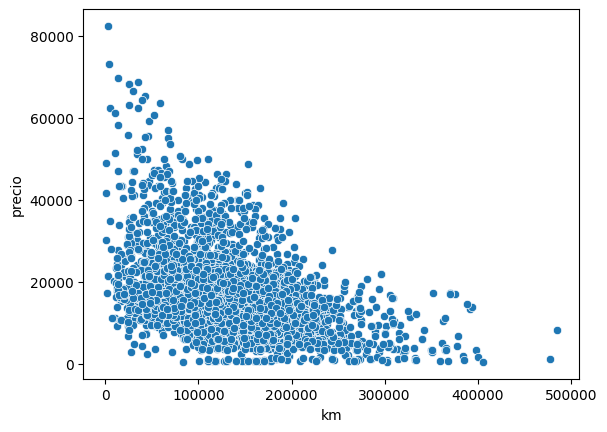

In [ ]:
sns.scatterplot(x="km", y="precio", data=df_bmw1) #VARIABLE NUMERICA

#Tiene relación: cuanto menos kilómetros más precio

#### 5. Potencia

In [ ]:
df_bmw2 = df_bmw1.copy() #Generamos una copia

<Axes: xlabel='potencia', ylabel='precio'>

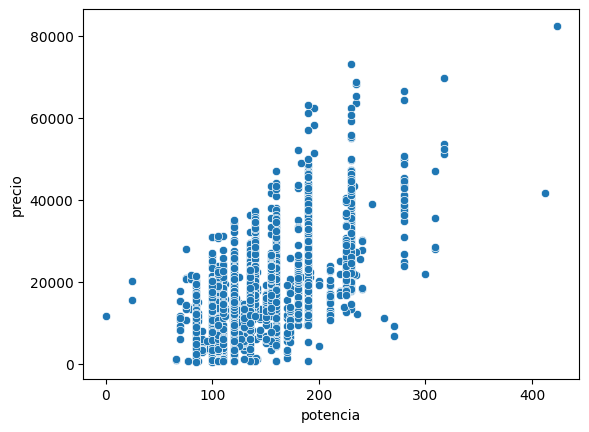

In [ ]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw2) #VARIABLE NUMERICA

#No es tan lineal, pero se observa la tendencia: cuanto mayor precio, mayor potencia

In [ ]:
df_bmw2[df_bmw2["potencia"]<70] #Vemos que existen 5 filas con potencia menor a una potencia de 70

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
1796,i3,152328.0,25.0,hatchback,False,True,False,False,False,False,True,True,20300.0,2014,02,04
1925,i3,152470.0,25.0,hatchback,False,True,False,False,False,False,True,True,15500.0,2014,02,03
2390,318,170529.0,66.0,hatchback,False,False,True,False,False,False,False,False,1000.0,2000,05,08
2771,316,146951.0,66.0,sedan,False,False,False,False,False,False,False,False,1300.0,1990,03,04
3765,X1,81770.0,0.0,suv,False,False,False,False,False,False,False,False,11700.0,2014,10,03


In [ ]:
df_bmw2.drop(df_bmw2[df_bmw2["potencia"] < 70].index, inplace=True)

<Axes: xlabel='potencia', ylabel='precio'>

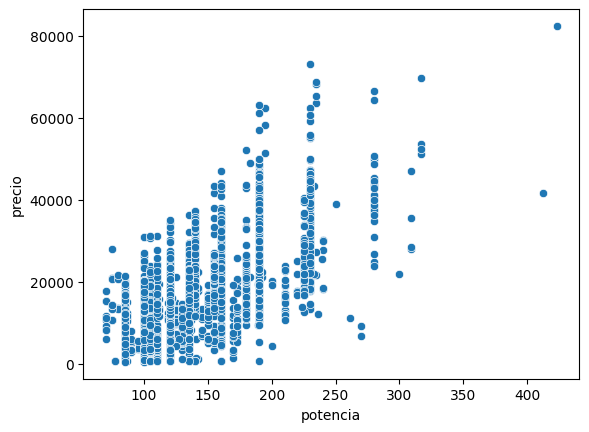

In [ ]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw2) #VARIABLE NUMERICA

In [ ]:
df_bmw2[df_bmw2["potencia"]>350] #Analizamos posibles outliers

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
3601,M5,150187.0,412.0,sedan,True,True,True,False,True,True,True,True,41600.0,2012,02,09
4146,X6 M,2970.0,423.0,suv,True,True,True,False,False,False,True,True,82400.0,2016,04,04


In [ ]:
df_bmw2[df_bmw2["modelo"] == "X6 M"] #Eliminamos la fila con potencia en 423 ya que corresponde a un outlier si lo comparamos con el resto de las filas del mismo modelo de coche

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
3829,X6 M,39725.0,280.0,suv,False,True,False,True,True,True,True,False,64300.0,2016,05,01
3986,X6 M,115569.0,280.0,suv,True,True,False,True,False,True,True,True,34800.0,2013,06,06
4109,X6 M,67798.0,190.0,suv,True,True,True,True,False,True,True,True,57100.0,2015,02,03
4146,X6 M,2970.0,423.0,suv,True,True,True,False,False,False,True,True,82400.0,2016,04,04
4166,X6 M,53221.0,180.0,suv,True,True,True,True,False,True,True,True,42800.0,2014,04,04
4282,X6 M,90157.0,190.0,suv,True,True,True,True,True,True,True,True,48800.0,2015,05,05
4535,X6 M,94673.0,225.0,suv,True,True,True,True,False,False,True,True,39500.0,2013,10,07
4557,X6 M,124726.0,280.0,suv,True,True,True,True,True,True,True,True,38700.0,2013,07,07


In [ ]:
df_bmw2.drop(df_bmw2[df_bmw2["potencia"] > 420].index, inplace=True)

In [ ]:
df_bmw2[df_bmw2["potencia"]>350] #Confirmamos que hemos eliminado el outlier

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
3601,M5,150187.0,412.0,sedan,True,True,True,False,True,True,True,True,41600.0,2012,02,09


#### 6. Precio - TARGET

In [ ]:
df_bmw3 = df_bmw2.copy()

<Axes: xlabel='precio'>

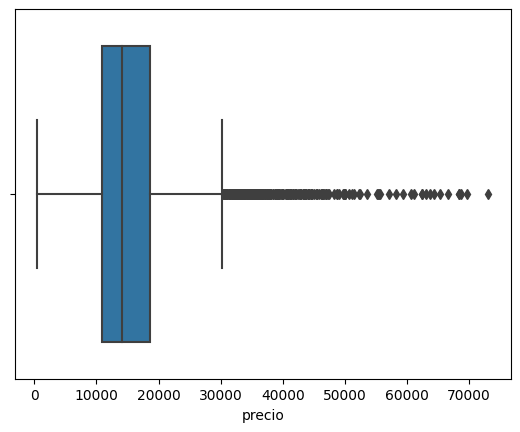

In [ ]:
sns.boxplot(x=df_bmw3["precio"])

#Vemos que existen outliers, procedemos a analizarlos

<Axes: >

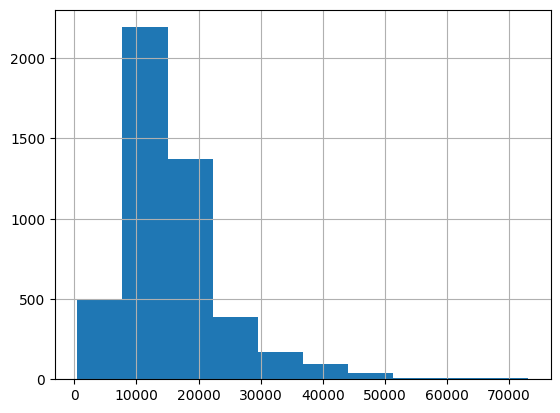

In [ ]:
df_bmw3["precio"].hist() #Normalizaremos el TARGET

In [ ]:
df_bmw3['precioLN'] = df_bmw3['precio'].apply(lambda x: np.log1p(x))
TARGET_LN = 'precioLN'

<Axes: >

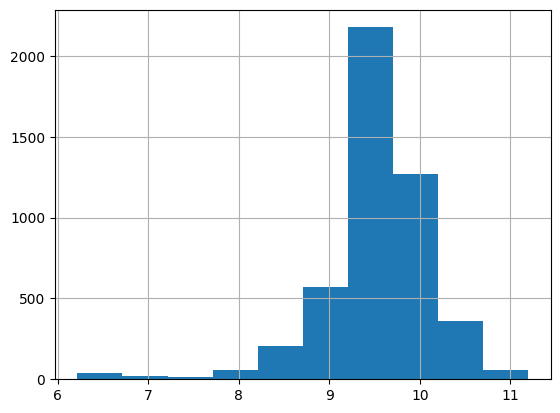

In [ ]:
df_bmw3["precioLN"].hist()

#### 8 . TRANSFORMACIONES - OHE & MINMAXSCALER

In [ ]:
df_bmw4 = df_bmw3.copy()

In [ ]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4774 non-null   object 
 1   km                           4774 non-null   float64
 2   potencia                     4774 non-null   float64
 3   tipo_coche                   4774 non-null   object 
 4   volante_regulable            4774 non-null   object 
 5   aire_acondicionado           4774 non-null   object 
 6   camara_trasera               4774 non-null   object 
 7   asientos_traseros_plegables  4774 non-null   object 
 8   elevalunas_electrico         4774 non-null   object 
 9   bluetooth                    4774 non-null   object 
 10  gps                          4774 non-null   bool   
 11  alerta_lim_velocidad         4774 non-null   object 
 12  precio                       4774 non-null   float64
 13  anio_registro     

In [ ]:
df_bmw4["potencia"] = MinMaxScaler().fit_transform(df_bmw4["potencia"].values.reshape(-1,1)) # Reemplazamos con un minmaxscaler la columna potencia

In [ ]:
df_bmw4["km"] = MinMaxScaler().fit_transform(df_bmw4["km"].values.reshape(-1,1)) # Reemplazamos con un minmaxscaler la columna km

In [ ]:
# Crear una lista de columnas booleanas
variables_boolenas = ["tipo_coche", "volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad", "anio_registro", "mes_registro", "mes_venta", "modelo"]

# Iterar sobre cada columna booleana
for column in variables_boolenas:
    # Aplicar One-Hot Encoding a la columna actual
    encoded_columns = pd.get_dummies(df_bmw4[column], prefix=column)

    # Concatenar el DataFrame resultante con la columna transformada
    df_bmw4 = pd.concat([df_bmw4, encoded_columns], axis=1)

# Eliminar las columnas booleanas originales
df_bmw4 = df_bmw4.drop(variables_boolenas, axis=1)

In [ ]:
df_bmw4.head()

,km,potencia,precio,precioLN,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,...,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,modelo_i3
0,0.289039,0.087719,11300.0,9.332646,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.027787,0.722222,69700.0,11.151970,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.377621,0.146199,10200.0,9.230241,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.263476,0.190058,25100.0,10.130663,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.199573,0.263158,33400.0,10.416341,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### MODELING ######

In [ ]:
#decidimos utilizar la aleatoriedad para particionar el modelo

p_dev = 0.70 # Porcentaje de train

df_bmw4['is_train'] = np.random.uniform(0, 1, len(df_bmw4)) <= p_dev
dev_df_bmw4, val_df_bmw4 = df_bmw4[df_bmw4['is_train']==True], df_bmw4[df_bmw4['is_train']==False]
df_bmw4 = df_bmw4.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(dev_df_bmw4))
print("Ejemplos usados para validación: ", len(val_df_bmw4))

1- Asignación de atributos y target a las variables X e Y

In [ ]:
dev_df_bmw4_X = dev_df_bmw4.drop('precio', axis=1)
dev_df_bmw4_y = dev_df_bmw4[['precio']]

In [ ]:
val_df_bmw4_X = val_df_bmw4.drop('precio', axis=1)
val_ddf_bmw4_y = val_df_bmw4[['precio']]

2- Random hold out

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_bmw4_X, # X
                                        dev_df_bmw4_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio
                                        random_state = 42
                                     )

3- Checks previos

In [ ]:
dev_df_bmw4_X.head().T

In [ ]:
X_train.info(verbose=False)

In [ ]:
X_test.info(verbose=False)

In [ ]:
X_train.describe().T.head()

In [ ]:
X_test.describe().T.head()

In [ ]:
y_train.describe().T.head()

In [ ]:
y_test.describe().T.head()

## Model definition

1- Importamos librerias y creamos variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X = df_renfe_final.drop('PRECIO',axis=1) # INDEPENDIENTES VARIABLES
y = df_renfe_final['PRECIO'] # VARIABLES DEPENDIENTE (A PREDECIR)

2- Instanciamos el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
df_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
print ("MSE", metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
df_resultados["dif"]=df_resultados["Predicted"]-df_resultados["Actual"]

In [ ]:
df_resultados.sort_values(by="dif")

In [ ]:
df_resultados.hist("dif")